# LSTM-InfoGAN for sinewave generation with noise (2 dimension feature control)

In [1]:
import tensorflow as tf
import tensorflow_gan as tfgan
import numpy as np

import utils

from rnninfogan import LSTMTFGAN

/home/jw855/anaconda3/envs/huawei/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jw855/anaconda3/envs/huawei/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jw855/anaconda3/envs/huawei/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jw855/anaconda3/envs/huawei/lib/python3.6/s

/home/jw855/anaconda3/envs/huawei/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jw855/anaconda3/envs/huawei/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jw855/anaconda3/envs/huawei/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jw855/anaconda3/envs/h

### The hyperparameter setting

In [2]:
# hyperparameter setting:
hparams = tf.contrib.training.HParams(
    is_training=True,
    batch_size=50,
    buffer_size=14000,
    sequence_length=50,
    epoch=300,
    structured_continuous_dim=3,
    unstructured_continuous_noise_dims=3,
    mutual_information_penalty_weight=1.0,

    num_units=128,
    gan_loss='min_max',
    d_lr=0.00009,
    g_lr=0.0001,
    generator_train_steps=1,
    discriminator_train_steps=1,
    interval=60,
    num_eval=128
)

### Create the dataset

In [4]:
train_sequence = utils.sine_wave_with_noise(seq_length=hparams.sequence_length, 
                                 num_samples=hparams.buffer_size,
                                 amplitude_low=0.1, amplitude_high=2.0
                                 )
train_dataset = tf.data.Dataset.from_tensor_slices(train_sequence).shuffle(hparams.buffer_size).batch(
        hparams.batch_size)

train_dataset = tf.data.Dataset.from_tensor_slices(train_sequence).shuffle(hparams.buffer_size).batch(hparams.batch_size)
iterator = tf.data.make_initializable_iterator(train_dataset)
real_sequence = iterator.get_next()

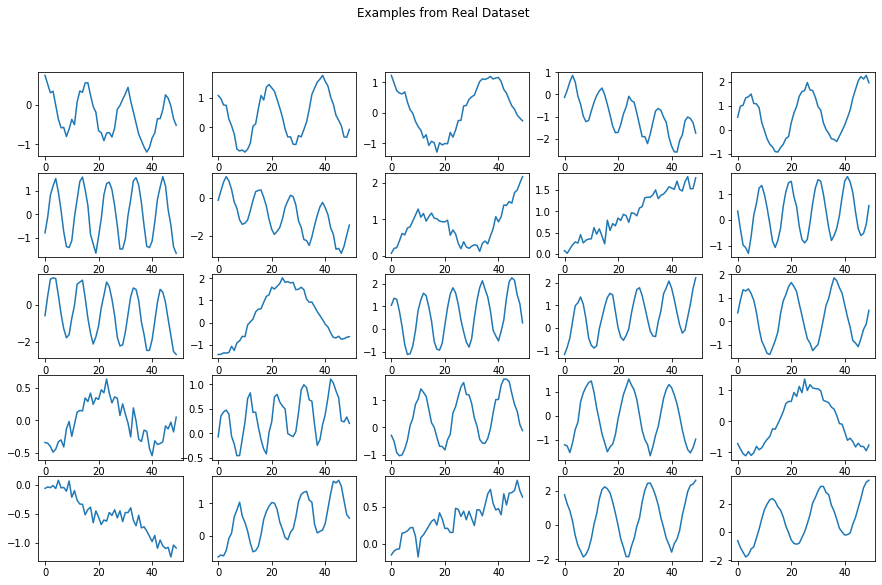

In [5]:
with tf.Session() as sess:
    sess.run(iterator.initializer)
    result = np.array(sess.run(real_sequence))

    # create the anomaly with sawwave (half sequence is sinewave, another half is the superposition of sinewave and saw wave) 
    utils.plot_sample_sequence(result, 5, 5, fig_title='Examples from Real Dataset')

### Create InfoGAN model

In [6]:
lstm_gan = LSTMTFGAN(train_dataset, hparams)



Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Instructions for updating:
Colocations handled automatically by placer.





In [ ]:
def generate_test_noise_for_infogan(sequence_length=50,
                                    unstructured_categorical_noise_dims=2,
                                    unstructured_continuous_noise_dims=3):
    num_dim_1 = 5
    num_dim_2 = 5
    cont_dim1 = np.linspace(-1.0, 1.0, num_dim_1)
    cont_dim2 = np.linspace(-1.0, 1.0, num_dim_2)

    cont_noise = []
    cat_noise = []
    for i in range(num_dim_1):
        for j in range(num_dim_2):
            cont_noise.append([0.0, cont_dim1[i], cont_dim2[j]])
            cat_noise.append(1)

    cont_noise = np.array(cont_noise, dtype=np.float32)
    cat_noise = np.array(cat_noise, dtype=np.int32)
    unconditional_noise = np.random.normal(size=[25, sequence_length,
                                                 unstructured_continuous_noise_dims])

    unconditional_noise = np.array(unconditional_noise, dtype=np.float32)

    return unconditional_noise, cat_noise, cont_noise

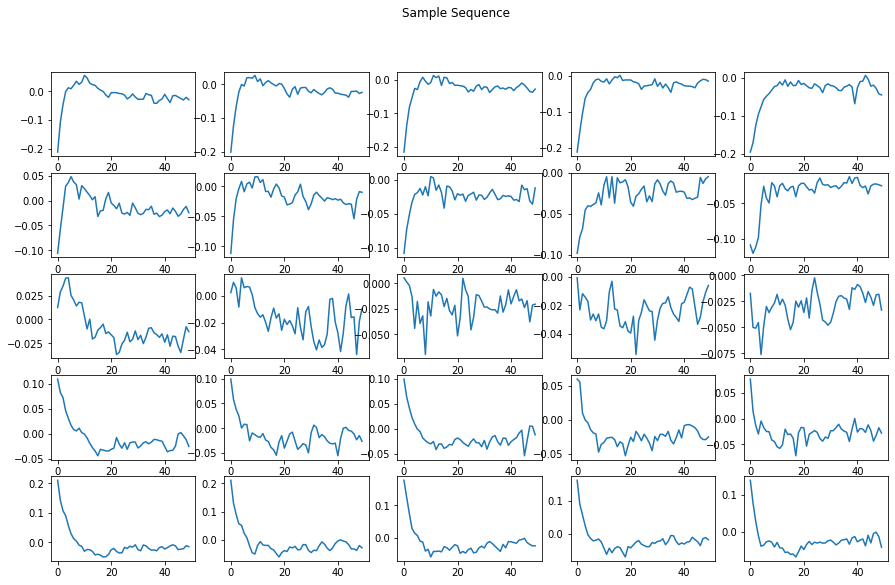

Successfully save infogan model!
Current loss: 2.317055


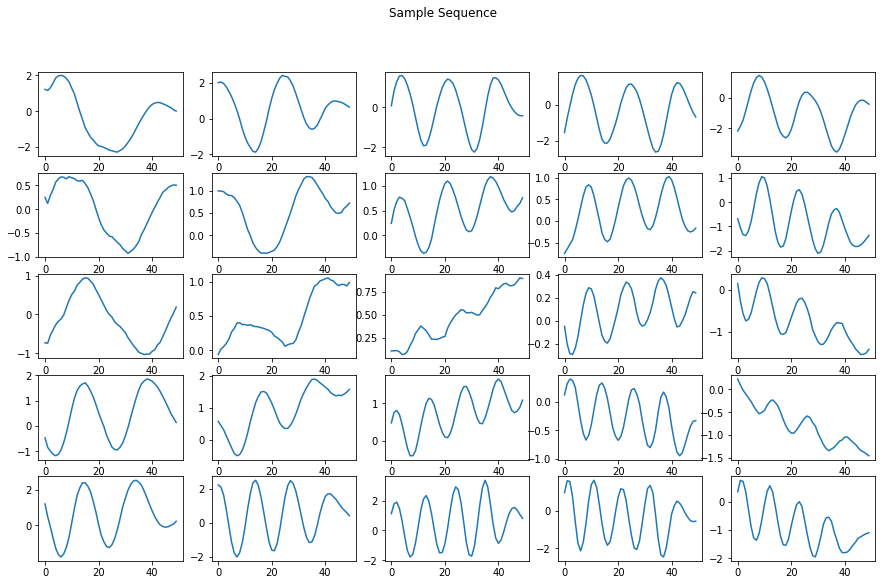

Successfully save infogan model!
Current loss: 2.329548


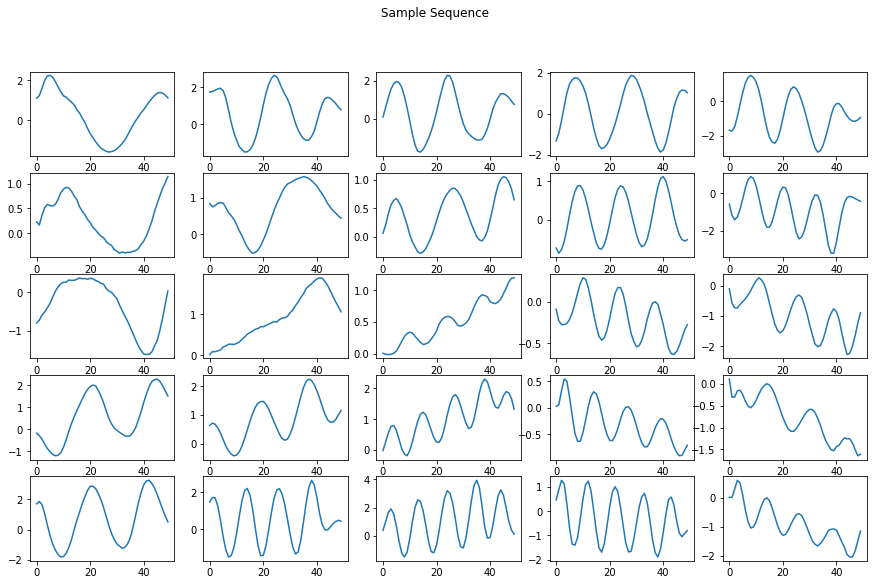

Successfully save infogan model!
Current loss: 2.330143


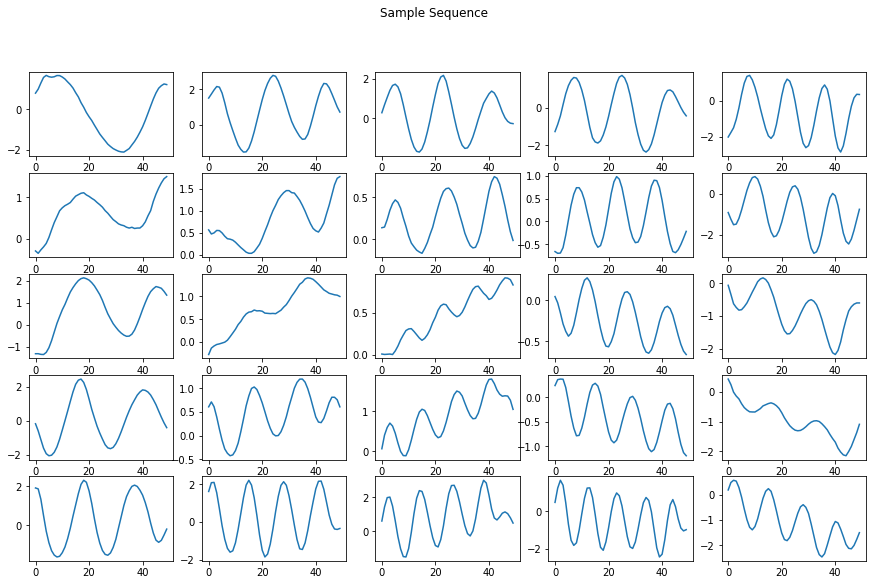

Successfully save infogan model!
Current loss: 2.351704


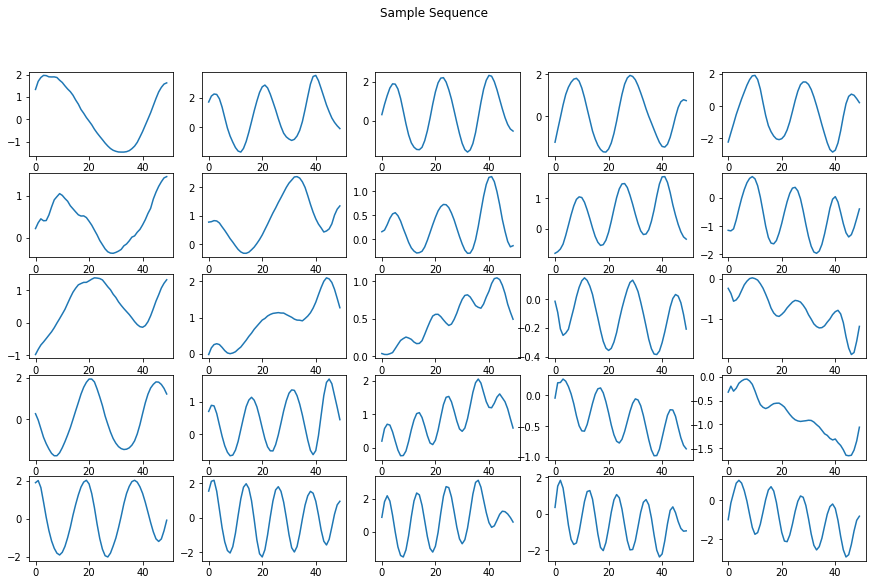

Successfully save infogan model!
Current loss: 2.358729


In [7]:
lstm_gan.train(save_path='./models/infogan_model_noisesinewave_', 
               test_noise_generator=generate_test_noise_for_infogan)

In [50]:
def generate_test_noise_for_infogan(sequence_length=50,
                                    unstructured_continuous_noise_dims=3):
    
    cont_dim1 = np.linspace(-1.0, 1.0, 25)

    cont_noise = []
    for i in range(25):
        cont_noise.append([cont_dim1[i], 1.0, 1.0])

    cont_noise = np.array(cont_noise, dtype=np.float32)
    unconditional_noise = np.random.normal(size=[25, sequence_length,
                                                 unstructured_continuous_noise_dims])

    unconditional_noise = np.array(unconditional_noise, dtype=np.float32)

    return unconditional_noise, cont_noise

In [51]:
unconditional_noise, cont_noise = generate_test_noise_for_infogan()

INFO:tensorflow:Restoring parameters from ./models/infogan_model_noisesinewave_240


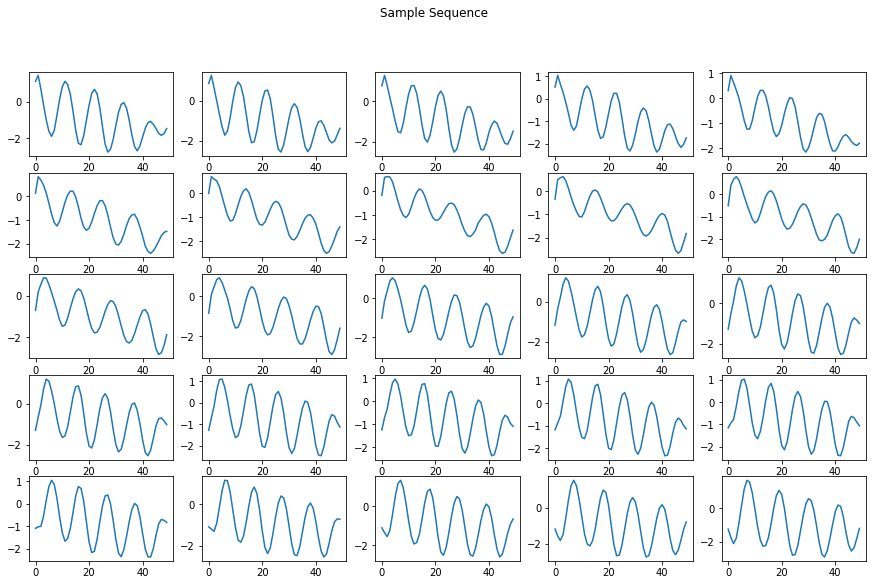

In [52]:
with tf.Session() as sess:
    lstm_gan.load_model(sess, "./models/infogan_model_noisesinewave_240")
    ret = lstm_gan.inference(sess, unconditional_noise, cont_noise)
    utils.plot_sequence(ret, 5, 5, fig_title='Sample Sequence')

In [44]:
def generate_test_noise_for_infogan(sequence_length=50,
                                    unstructured_continuous_noise_dims=3):
    
    cont_dim1 = np.linspace(-1.0, 1.0, 25)

    cont_noise = []
    for i in range(25):
        cont_noise.append([ 1.0, cont_dim1[i], 1.0])

    cont_noise = np.array(cont_noise, dtype=np.float32)
    unconditional_noise = np.random.normal(size=[25, sequence_length,
                                                 unstructured_continuous_noise_dims])

    unconditional_noise = np.array(unconditional_noise, dtype=np.float32)

    return unconditional_noise, cont_noise

In [45]:
unconditional_noise, cont_noise = generate_test_noise_for_infogan()

INFO:tensorflow:Restoring parameters from ./models/infogan_model_noisesinewave_240


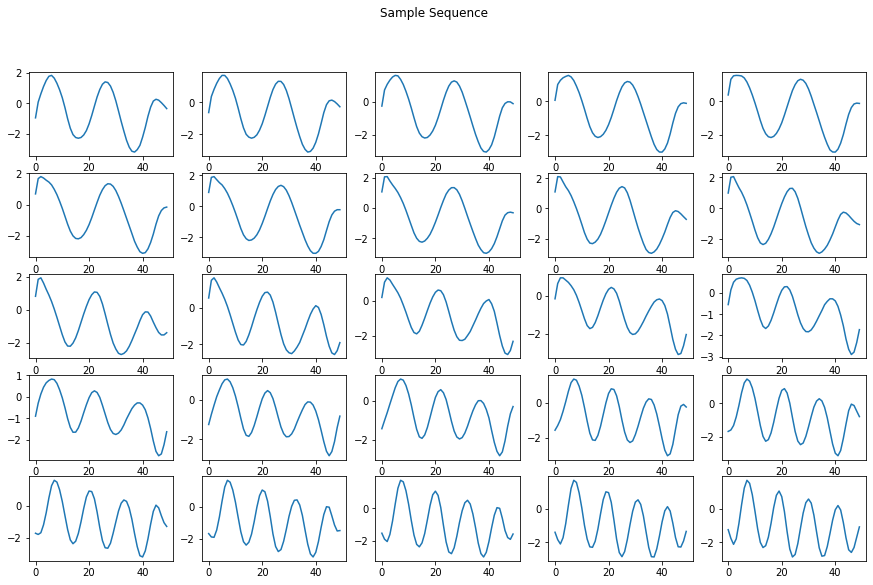

In [46]:
with tf.Session() as sess:
    lstm_gan.load_model(sess, "./models/infogan_model_noisesinewave_240")
    ret = lstm_gan.inference(sess, unconditional_noise, cont_noise)
    utils.plot_sequence(ret, 5, 5, fig_title='Sample Sequence')

In [47]:
def generate_test_noise_for_infogan(sequence_length=50,
                                    unstructured_continuous_noise_dims=3):
    
    cont_dim1 = np.linspace(-1.0, 1.0, 25)

    cont_noise = []
    for i in range(25):
        cont_noise.append([ 1.0,  1.0, cont_dim1[i]])

    cont_noise = np.array(cont_noise, dtype=np.float32)
    unconditional_noise = np.random.normal(size=[25, sequence_length,
                                                 unstructured_continuous_noise_dims])

    unconditional_noise = np.array(unconditional_noise, dtype=np.float32)

    return unconditional_noise, cont_noise

In [48]:
unconditional_noise, cont_noise = generate_test_noise_for_infogan()

INFO:tensorflow:Restoring parameters from ./models/infogan_model_noisesinewave_240


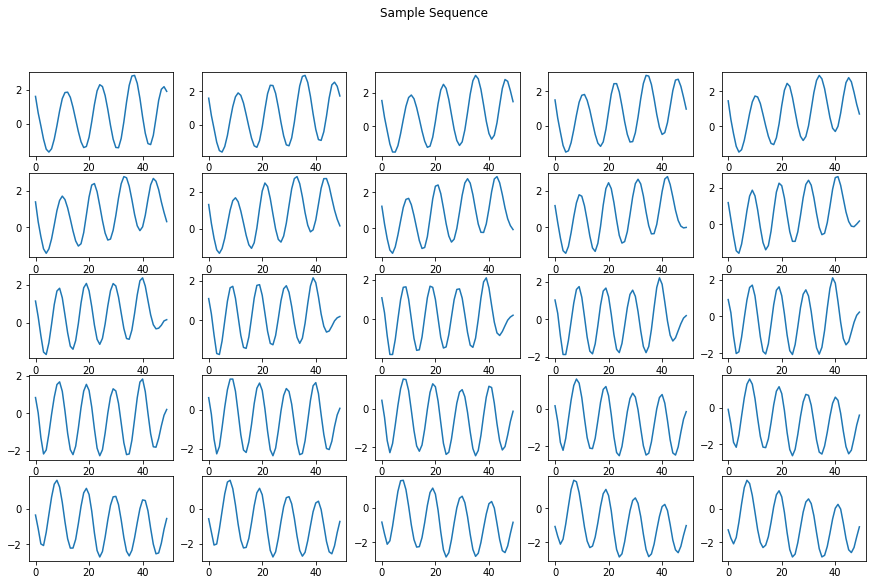

In [49]:
with tf.Session() as sess:
    lstm_gan.load_model(sess, "./models/infogan_model_noisesinewave_240")
    ret = lstm_gan.inference(sess, unconditional_noise, cont_noise)
    utils.plot_sequence(ret, 5, 5, fig_title='Sample Sequence')

In [70]:
def generate_test_noise_for_infogan(sequence_length=50,
                                    unstructured_continuous_noise_dims=3):
    
    cont_dim1 = np.linspace(-1.0, 1.0, 25)

    cont_noise = []
    for i in range(25):
        cont_noise.append([ 0.5,  1.0, cont_dim1[i]])

    cont_noise = np.array(cont_noise, dtype=np.float32)
    unconditional_noise = np.random.normal(size=[25, sequence_length,
                                                 unstructured_continuous_noise_dims])

    unconditional_noise = np.array(unconditional_noise, dtype=np.float32)

    return unconditional_noise, cont_noise

In [71]:
unconditional_noise, cont_noise = generate_test_noise_for_infogan()

INFO:tensorflow:Restoring parameters from ./models/infogan_model_noisesinewave_240


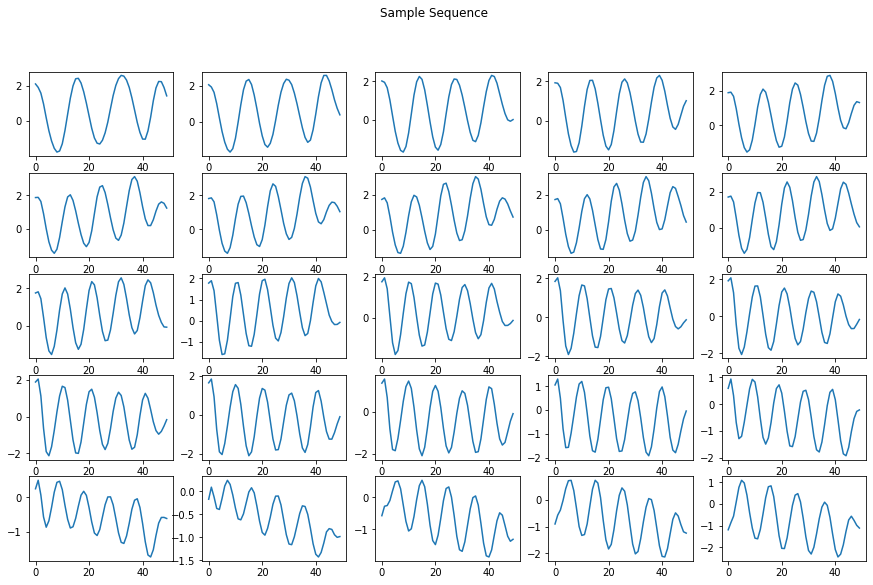

In [72]:
with tf.Session() as sess:
    lstm_gan.load_model(sess, "./models/infogan_model_noisesinewave_240")
    ret = lstm_gan.inference(sess, unconditional_noise, cont_noise)
    utils.plot_sequence(ret, 5, 5, fig_title='Sample Sequence')